In [1]:
#random forest classification algorithm to compare with the decision tree classification algorithm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/banknotes.csv')
print('Bank Notes Data\n',df)

Bank Notes Data
       Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


In [3]:
# separate the input and output variable
x = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']] #4input variable
#x=df.drop('class', axis = 1) this can be used instead of above
y = df['Class']#output variable

In [4]:
#cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [5]:
x_train.shape, x_test.shape, y_test.shape, y_test.shape

((1029, 4), (343, 4), (343,), (343,))

In [23]:
# build the model
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state = 0, n_estimators = 10) # n_estimators is no of ensembles or subsets

In [24]:
clf_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [25]:
#performance evoluation
y_pred = clf_rf.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [26]:
y_test.value_counts()

Class
0    195
1    148
Name: count, dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [28]:
print(confusion_matrix(y_test, y_pred))

[[193   2]
 [  0 148]]


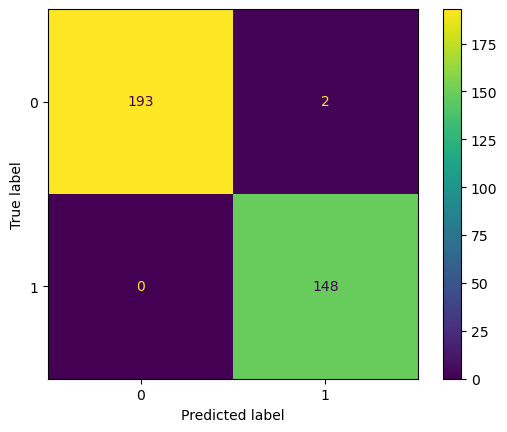

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [30]:
accuracy_score(y_test, y_pred)

0.9941690962099126

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [39]:
clf_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

In [42]:
# visualization of tree
from sklearn.tree import plot_tree

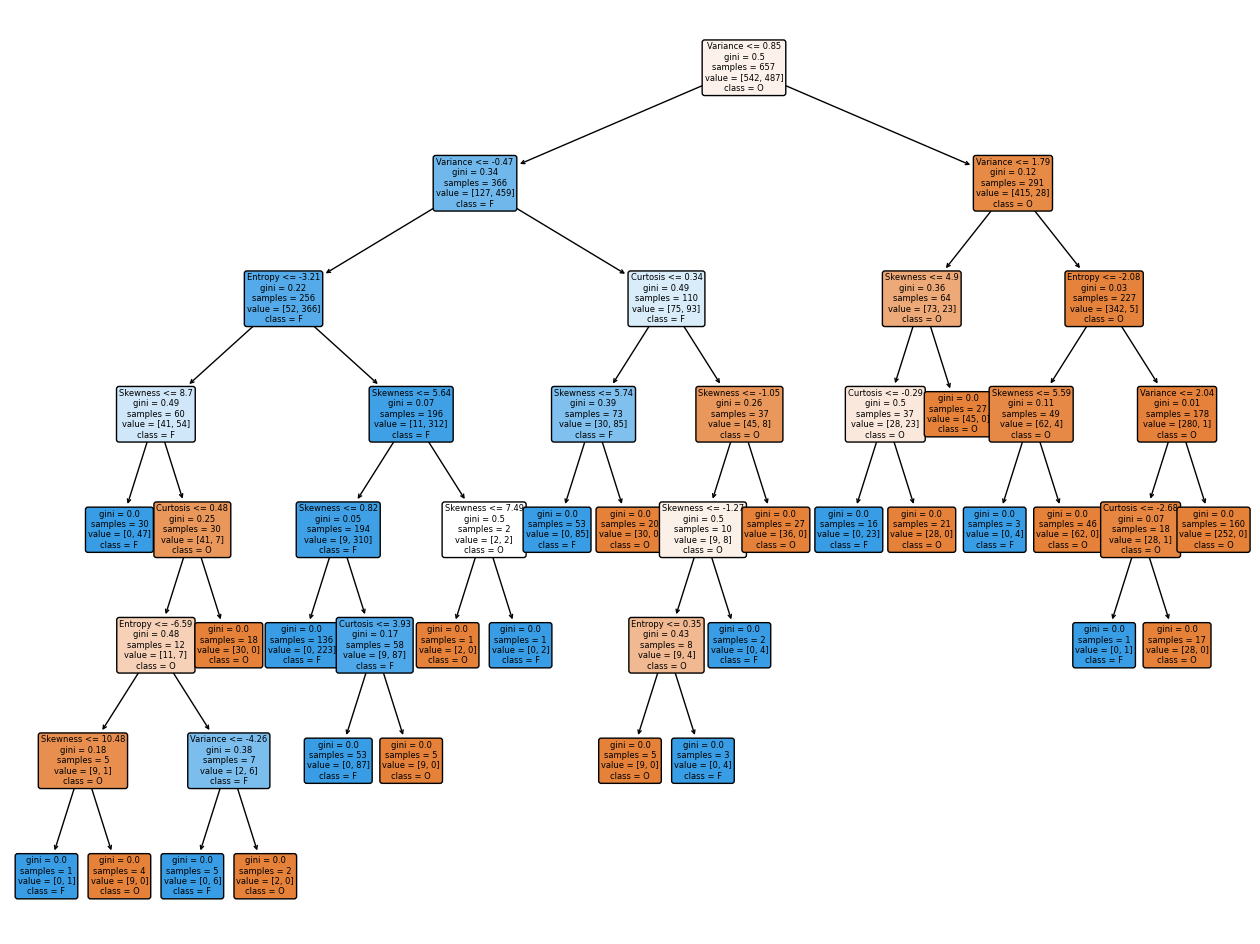

In [48]:
plt.figure(figsize = (16,12))
plot_tree(clf_rf.estimators_[2], fontsize=6, feature_names=x.columns, filled = True, precision=2, class_names=['O', 'F'], rounded=True);
#plt.savefig('banknoterftree.jpg')

In [49]:
%%time
clf_rf.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 22 ms


RandomForestClassifier(n_estimators=10, random_state=0)

In [50]:
#build model
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf_tree = DecisionTreeClassifier( random_state = 0)

In [53]:
%%time
clf_tree.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 4 ms


DecisionTreeClassifier(random_state=0)

In [54]:
import time

In [55]:
time.time() #module name

1720681310.5909607

In [56]:
time.asctime()

'Thu Jul 11 12:34:49 2024'

In [58]:
time.altzone

-23400

In [61]:
start = time.time()
clf_tree.fit(x_train, y_train)
end = time.time()
print('Decision tree', end-start)

start = time.time()
clf_rf.fit(x_train,y_train)
end = time.time()
print('Decision tree', end-start)

Decision tree 0.0030002593994140625
Decision tree 0.019999027252197266
